## Reading DataFrames from multiple files

In [2]:
import pandas as pd

#### with a loop

In [30]:
# Create the list of file names: filenames
filenames = ['Data/winter_games.csv', 'Data/summer_games.csv']

# Create the list of three DataFrames: dataframes
dataframes = []
for filename in filenames:
    dataframes.append(pd.read_csv(filename))

# Print top 5 rows of 1st DataFrame in dataframes
print(dataframes[0].head())

   Year      City     Sport Discipline               Athlete Country Gender  \
0  1924  Chamonix  Biathlon   Biathlon           BERTHET, G.     FRA    Men   
1  1924  Chamonix  Biathlon   Biathlon        MANDRILLON, C.     FRA    Men   
2  1924  Chamonix  Biathlon   Biathlon   MANDRILLON, Maurice     FRA    Men   
3  1924  Chamonix  Biathlon   Biathlon       VANDELLE, André     FRA    Men   
4  1924  Chamonix  Biathlon   Biathlon  AUFDENBLATTEN, Adolf     SUI    Men   

             Event   Medal  
0  Military Patrol  Bronze  
1  Military Patrol  Bronze  
2  Military Patrol  Bronze  
3  Military Patrol  Bronze  
4  Military Patrol    Gold  


#### using comprehension

In [32]:
# Create the list of file names: filenames
filenames = ['Data/winter_games.csv', 'Data/summer_games.csv']

# Create the list of three DataFrames: dataframes
dataframes = [pd.read_csv(f) for f in filenames]

# Print top 5 rows of 1st DataFrame in dataframes
print(dataframes[0].head())

   Year      City     Sport Discipline               Athlete Country Gender  \
0  1924  Chamonix  Biathlon   Biathlon           BERTHET, G.     FRA    Men   
1  1924  Chamonix  Biathlon   Biathlon        MANDRILLON, C.     FRA    Men   
2  1924  Chamonix  Biathlon   Biathlon   MANDRILLON, Maurice     FRA    Men   
3  1924  Chamonix  Biathlon   Biathlon       VANDELLE, André     FRA    Men   
4  1924  Chamonix  Biathlon   Biathlon  AUFDENBLATTEN, Adolf     SUI    Men   

             Event   Medal  
0  Military Patrol  Bronze  
1  Military Patrol  Bronze  
2  Military Patrol  Bronze  
3  Military Patrol  Bronze  
4  Military Patrol    Gold  


#### glob module

In [35]:
from glob import glob

filenames = glob('Data/*games.csv')
print(filenames)

['Data\\summer_games.csv', 'Data\\winter_games.csv']


In [79]:
# Create the list of three DataFrames: dataframes
dataframes = [pd.read_csv(f) for f in filenames]

# Print top 5 rows of 1st DataFrame in dataframes
print(dataframes[0].head())
dataframes[0].columns

   Year    City     Sport Discipline             Athlete Country Gender  \
0  1896  Athens  Aquatics   Swimming       HAJOS, Alfred     HUN    Men   
1  1896  Athens  Aquatics   Swimming    HERSCHMANN, Otto     AUT    Men   
2  1896  Athens  Aquatics   Swimming   DRIVAS, Dimitrios     GRE    Men   
3  1896  Athens  Aquatics   Swimming  MALOKINIS, Ioannis     GRE    Men   
4  1896  Athens  Aquatics   Swimming  CHASAPIS, Spiridon     GRE    Men   

                        Event   Medal  
0              100M Freestyle    Gold  
1              100M Freestyle  Silver  
2  100M Freestyle For Sailors  Bronze  
3  100M Freestyle For Sailors    Gold  
4  100M Freestyle For Sailors  Silver  


Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

### Reindexing

In [47]:
weather_mean = pd.read_excel("Data/weather_mean.xlsx", index_col="Month")
weather_mean

,Mean Temperature F
Month,
Apr,61.9
Jan,32.1
Jul,68.9
Oct,43.4


* Reorder the rows of weather1 using the .reindex() method with the list year as the argument, which contains the abbreviations for each month.

In [48]:
year = ['Jan',  'Feb',  'Mar',  'Apr',  'May',  'Jun',  'Jul',  'Aug',  'Sep',  'Oct',  'Nov',  'Dec']

# Reindex weather_mean using the list year: weather_mean_1
weather_mean_1 = weather_mean.reindex(year)

# Print weather_mean_1
print(weather_mean_1)

       Mean Temperature F
Month                    
Jan                  32.1
Feb                   NaN
Mar                   NaN
Apr                  61.9
May                   NaN
Jun                   NaN
Jul                  68.9
Aug                   NaN
Sep                   NaN
Oct                  43.4
Nov                   NaN
Dec                   NaN


In [49]:
# Reindex weather_mean using the list year with forward-fill: weather_mean_2
#  chaining the .ffill() method to replace the null values with the last preceding non-null value.
weather_mean_2 = weather_mean.reindex(year).ffill()

# Print weather_mean_2
print(weather_mean_2)

       Mean Temperature F
Month                    
Jan                  32.1
Feb                  32.1
Mar                  32.1
Apr                  61.9
May                  61.9
Jun                  61.9
Jul                  68.9
Aug                  68.9
Sep                  68.9
Oct                  43.4
Nov                  43.4
Dec                  43.4


## Arithmetic with Series & DataFrames

In [56]:
february = pd.read_excel("Data/february.xlsx", index_col="Company")
january = pd.read_excel("Data/january.xlsx", index_col="Company")
print(february)
print(january)

                  Units
Company                
Acme Corporation     15
Hooli                 3
Mediacore            13
Vandelay Inc         25
                  Units
Company                
Acme Corporation     19
Hooli                17
Initech              20
Mediacore            10
Streeplex            13


In [57]:
# adding these two DataFrames by "+" operator

total = february + january
total

,Units
Company,
Acme Corporation,34.0
Hooli,20.0
Initech,NaN
Mediacore,23.0
Streeplex,NaN
Vandelay Inc,NaN


In [61]:
# adding these two DataFrames by "add" method 
# and passing in "fill_value=0"

total = february.add(january, fill_value=0)
total

,Units
Company,
Acme Corporation,34.0
Hooli,20.0
Initech,20.0
Mediacore,23.0
Streeplex,13.0
Vandelay Inc,25.0


### Broadcasting in arithmetic formulas

In [67]:
temps = pd.read_excel("Data/temps.xlsx", index_col="Date")
temps.head()

,Min TemperatureF,Mean TemperatureF,Max TemperatureF
Date,,,
2013-01-01,21,28,32
2013-01-02,17,21,25
2013-01-03,16,24,32
2013-01-04,27,28,30
2013-01-05,25,30,34


In [68]:
# Convert temps_f to celsius: temps_c
temps_c = (temps - 32) * 5/9

# Rename 'F' in column names with 'C': temps_c.columns
temps_c.columns = temps.columns.str.replace('F', 'C')

# Print first 5 rows of temps_c
print(temps_c.head())

            Min TemperatureC  Mean TemperatureC  Max TemperatureC
Date                                                             
2013-01-01         -6.111111          -2.222222          0.000000
2013-01-02         -8.333333          -6.111111         -3.888889
2013-01-03         -8.888889          -4.444444          0.000000
2013-01-04         -2.777778          -2.222222         -1.111111
2013-01-05         -3.888889          -1.111111          1.111111


### slicing, resampling and computing the percentage growth

In [72]:
# Read 'GDP.csv' into a DataFrame: gdp
gdp = pd.read_csv("Data/GDP.csv", parse_dates=True, index_col="DATE")

# Slice all the gdp data from 2008 onward: post2008
post2008 = gdp["2008":]

# Print the last 8 rows of post2008
post2008.tail(8)

,GDP
DATE,
2018-01-01,20163.159
2018-04-01,20510.177
2018-07-01,20749.752
2018-10-01,20897.804
2019-01-01,21098.827
2019-04-01,21340.267
2019-07-01,21542.540
2019-10-01,21734.266


* .resample() (using the alias 'A' for annual frequency) with some kind of aggregation; here we use the aggregation method .last() to select the last element when resampling.

In [73]:
# Resample post2008 by year, keeping last(): yearly
yearly = post2008.resample("A").last()

# Print yearly
print(yearly)

# Compute percentage growth of yearly: yearly['growth']
yearly['growth'] = yearly.pct_change()*100

# Print yearly again
print(yearly)

                  GDP
DATE                 
2008-12-31  14559.543
2009-12-31  14628.021
2010-12-31  15240.843
2011-12-31  15796.460
2012-12-31  16358.863
2013-12-31  17083.137
2014-12-31  17849.912
2015-12-31  18350.825
2016-12-31  18991.883
2017-12-31  19918.910
2018-12-31  20897.804
2019-12-31  21734.266
                  GDP    growth
DATE                           
2008-12-31  14559.543       NaN
2009-12-31  14628.021  0.470331
2010-12-31  15240.843  4.189371
2011-12-31  15796.460  3.645579
2012-12-31  16358.863  3.560310
2013-12-31  17083.137  4.427410
2014-12-31  17849.912  4.488491
2015-12-31  18350.825  2.806249
2016-12-31  18991.883  3.493347
2017-12-31  19918.910  4.881175
2018-12-31  20897.804  4.914395
2019-12-31  21734.266  4.002631


### Converting currency of stocks

In [75]:
# Read 'sp500.csv' into a DataFrame: sp500
dollars = pd.read_excel("Data/dollars.xlsx", parse_dates=True,  index_col='Date')

# Read 'exchange.csv' into a DataFrame: exchange
exchange = pd.read_excel("Data/exchange.xlsx", parse_dates=True,  index_col='Date')

print(dollars.head())
print(exchange.head())

                   Open        Close
Date                                
2015-01-02  2058.899902  2058.199951
2015-01-05  2054.439941  2020.579956
2015-01-06  2022.150024  2002.609985
2015-01-07  2005.550049  2025.900024
2015-01-08  2030.609985  2062.139893
            GBP/USD
Date               
2015-01-02  0.65101
2015-01-05  0.65644
2015-01-06  0.65896
2015-01-07  0.66344
2015-01-08  0.66151


In [80]:
# Convert dollars to pounds: pounds
pounds = dollars.multiply(exchange["GBP/USD"], axis="rows")

# Print the head of pounds
print(pounds.head())

                   Open        Close
Date                                
2015-01-02  1340.364425  1339.908750
2015-01-05  1348.616555  1326.389506
2015-01-06  1332.515980  1319.639876
2015-01-07  1330.562125  1344.063112
2015-01-08  1343.268811  1364.126161


### Importing flat files from the web: urlretrieve

* We will import a file from the web, save it locally and load it into a DataFrame.


In [4]:
# Import package
from urllib.request import urlretrieve

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Save file locally
urlretrieve(url, "Data/winequality-red.csv")

# Read file into a DataFrame and print its head
df = pd.read_csv('Data/winequality-red.csv', sep=';')
print(df.head(2))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  
0      9.4        5  
1      9.8        5  


* We can also load a file from the web into a DataFrame without first saving it locally, using pandas `pd.read_csv()` method.

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

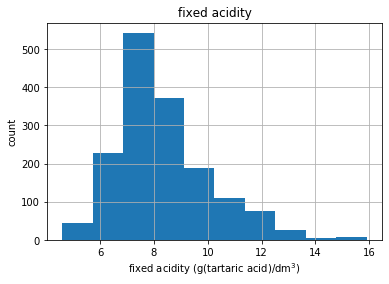

In [7]:
# Import packages
import matplotlib.pyplot as plt

# Assign url of file: url
url= 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Read file into a DataFrame: df
df= pd.read_csv(url, sep=";")

# Print the head of the DataFrame
print(df.head())

# Plot first column of df
pd.DataFrame.hist(df.iloc[:, 0:1])
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()

### Importing non-flat files from the web

We will use `pd.read_excel()` to read in all of its sheets, print the sheet names and then print the head of the first sheet using its name, not its index.

Note that the output of `pd.read_excel()` is a Python dictionary with sheet names as keys and corresponding DataFrames as corresponding values.

In [12]:
# Assign url of file: url
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'


# Read in all sheets of Excel file: xls
#  in order to import all sheets we need to pass None to the argument sheet_name
xls = pd.read_excel(url, sheet_name=None)

# Print the sheetnames to the shell
# these will be the keys of the dictionary xls
print(xls.keys())

# Print the head of the first sheet (using its name, NOT its index)
xls["1700"].head()

odict_keys(['1700', '1900'])


,country,1700
0,Afghanistan,34.565000
1,Akrotiri and Dhekelia,34.616667
2,Albania,41.312000
3,Algeria,36.720000
4,American Samoa,-14.307000


### Performing HTTP requests using requests module

In [21]:
# Import package
import requests

# Specify the url: url
url = "http://www.datacamp.com/teach/documentation"

# Packages the request, send the request and catch the response: r
r =requests.get(url)

# Extract the response: text
text = r.text

# Print the html
print(text[:2000])

<!doctype html>
<html lang="en" data-direction="ltr">
  <head>
    <link href="https://fonts.intercomcdn.com" rel="preconnect" crossorigin>
      <script src="https://www.googletagmanager.com/gtag/js?id=UA-39297847-9" async="async" nonce="mVtq32myU2R5XaR2mAg0jvU7JYlNp0es51/v2nZj7uA="></script>
      <script nonce="mVtq32myU2R5XaR2mAg0jvU7JYlNp0es51/v2nZj7uA=">
        window.dataLayer = window.dataLayer || [];
        function gtag(){dataLayer.push(arguments);}
        gtag('js', new Date());
        gtag('config', 'UA-39297847-9');
</script>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <title>DataCamp Help Center</title>
    <meta name="description" content="">
    <meta name="viewport" content="width=device-width, initial-scale=1">

      <link rel="alternate" href="http://instructor-support.datacamp.com/en/" hreflang="en">

      <meta name="intercom:trackingEvent" content="{&quot;name&quot;:&quot;Viewed Help Center&quot;,&quot;metadata&qu

### Parsing HTML with BeautifulSoup

In [26]:
# Import packages
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r= requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

# Print the response
print(pretty_soup[:500])

<html>
 <head>
  <title>
   Guido's Personal Home Page
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <h1>
   <a href="pics.html">
    <img border="0" src="images/IMG_2192.jpg"/>
   </a>
   Guido van Rossum - Personal Home Page
   <a href="pics.html">
    <img border="0" height="216" src="images/guido-headshot-2019.jpg" width="270"/>
   </a>
  </h1>
  <p>
   <a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm">
    <i>
     "Ga


* to extract the title and text from the webpage

In [31]:
# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Get the title of Guido's webpage: guido_title
guido_title = soup.title

# Print the title of Guido's webpage to the shell
print(guido_title)

# Get Guido's text: guido_text
guido_text = soup.text

# Print Guido's text to the shell
print(guido_text[:100])

<title>Guido's Personal Home Page</title>


Guido's Personal Home Page




Guido van Rossum - Personal Home Page


"Gawky and proud of it."
Wh


#### find all hyperlinks in soup

In [35]:
# Find all 'a' tags (which define hyperlinks): a_tags
a_tags = soup.find_all("a")

# Print the URLs to the shell
for link in a_tags:
    print(link.get("href"))

pics.html
pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
images/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
Resume.html
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif
